# **Assignment1 : Image Filtering and Gradient Operators**

### **Introduction to Image Filtering**

Image filtering is a crucial operation in computer vision that involves manipulating or analyzing images using various filters. Filters can enhance an image, highlight certain features, or detect edges and patterns that might not be immediately visible. The process involves convolving a filter (or kernel) with an image, which helps in transforming the image in specific ways.

In this assignment, we’ll focus on **spatial filtering**, which involves modifying the pixel values in an image based on their spatial relationship with neighboring pixels. This is done using a mathematical operation called **convolution**, where a filter (also known as a kernel) is applied to an image to produce a new image.

### **Types of Filters**
- **Smoothing Filters**: These reduce noise and detail in an image. An example is the averaging or blur filter.
- **Gradient Filters**: These detect changes in intensity and are often used for edge detection. Popular gradient filters include the Sobel and Laplacian filters.

In computer vision, **gradients** are often used to detect edges, as edges correspond to regions in an image where intensity values change abruptly. By applying gradient filters, we can highlight these changes, which often reveal important structures in the image.

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **Part 1 : Loading the Images in Grayscale**

For this task, you will load two images: `zebra.png` and `cameraman.png`, and convert them to grayscale. These images are provided as part of the assignment, and you'll use them to perform the filtering tasks.

The images can be loaded using OpenCV (`cv2`). When loading the images, we'll specify a flag to load them directly in grayscale.

> **Note**: We use grayscale images for simplicity in this assignment. Working with grayscale means dealing with only one channel (intensity), whereas RGB images have three channels (red, green, blue), making the convolution process more complex.

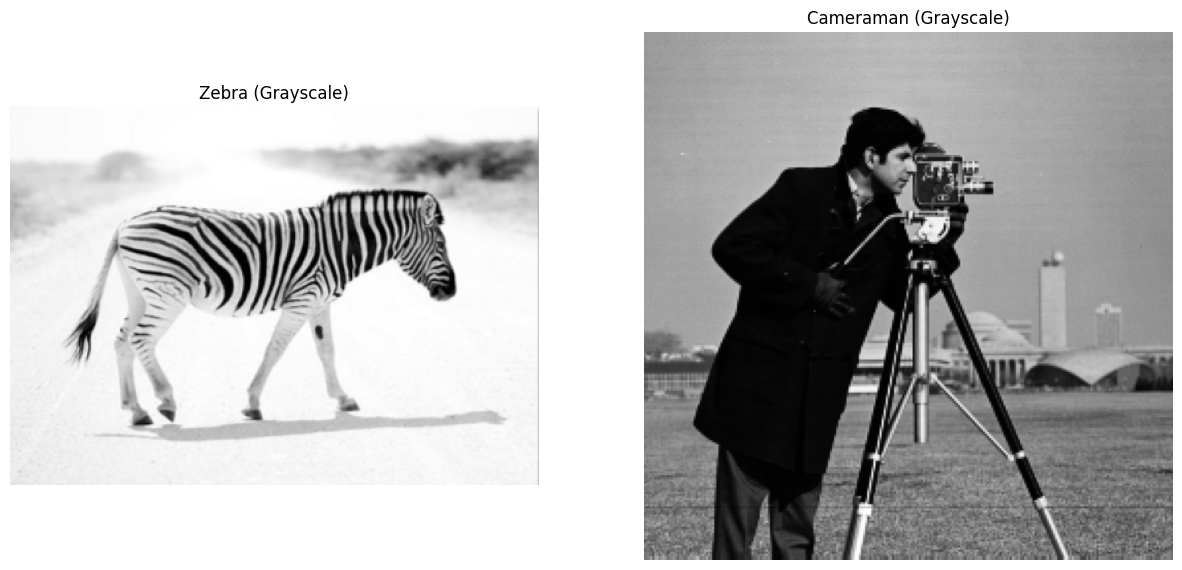

In [110]:
# Load the images in grayscale
zebra_image = cv2.imread('/content/drive/MyDrive/Computer Vision/Homeworks/Assignment 1/Part 1/images/zebra.png', cv2.IMREAD_GRAYSCALE)
cameraman_image = cv2.imread('/content/drive/MyDrive/Computer Vision/Homeworks/Assignment 1/Part 1/images/cameraman.png', cv2.IMREAD_GRAYSCALE)

# Convert the images to float32 for filtering operations
zebra_image = zebra_image.astype('float32')
cameraman_image = cameraman_image.astype('float32')

# Normalize pixel values to the range [0, 1]
zebra_image /= 255.0
cameraman_image /= 255.0

# Display the images
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Zebra (Grayscale)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Cameraman (Grayscale)")
plt.axis("off")

plt.show()

## **Part 2: Padding Methods**

### **Introduction to Padding**

When applying convolution to images, especially at the edges or boundaries, there is a need to define how to handle the pixels outside the image. This is where padding comes in. Padding helps us artificially expand the image to avoid losing information at the borders.

Two common padding techniques are:

1. **Zero Padding**: This technique adds a border of zeros around the image. It’s simple and often used when the boundaries of the image don’t carry much information.
   
   - **Example**: Consider a small 3x3 image:
     ```
     [ 1  2  3 ]
     [ 4  5  6 ]
     [ 7  8  9 ]
     ```
     If we apply 1-pixel zero padding, the image becomes:
     ```
     [ 0  0  0  0  0 ]
     [ 0  1  2  3  0 ]
     [ 0  4  5  6  0 ]
     [ 0  7  8  9  0 ]
     [ 0  0  0  0  0 ]
     ```
     Here, a border of zeros is added around the original image.

2. **Symmetric Padding**: In this technique, the padding replicates the values from the image borders. The pixels outside the image are a mirror reflection of the pixels on the edge.

   - **Example**: Using the same 3x3 image:
     ```
     [ 1  2  3 ]
     [ 4  5  6 ]
     [ 7  8  9 ]
     ```
     If we apply 1-pixel symmetric padding, the image becomes:
     ```
     [ 5  4  5  6  5 ]
     [ 2  1  2  3  2 ]
     [ 5  4  5  6  5 ]
     [ 8  7  8  9  8 ]
     [ 5  4  5  6  5 ]
     ```
     Here, the values at the borders are reflected from the original image, creating symmetry.

---

### **Your Task**

1. **Zero Padding**: Implement a function that takes an image and a padding size `p`, and returns the image padded with zeros. You must implement this manually without using any library functions like `np.pad`.

2. **Symmetric Padding**: Implement another function that applies symmetric padding to the image, again without using any library functions like `np.pad`.

In [111]:
def zero_padding(image, p):
    """
    Add zero padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Zero-padded image
    """

    if p == 0:  # No padding required
      return image

    h, w = image.shape

    # Create a new image with padded dimensions, filled with zeros
    padded_image = np.zeros((h + 2*p, w + 2*p), dtype=image.dtype)

    # Place the original image in the center of the padded image
    padded_image[p:p+h, p:p+w] = image

    return padded_image

def symmetric_padding(image, p):
    """
    Add symmetric padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Symmetrically padded image
    """
    if p == 0:  # No padding required
        return image

    h, w = image.shape

    # Create a new image with padded dimensions, filled with zeros
    padded_image = np.zeros((h + 2*p, w + 2*p), dtype=image.dtype)

    # Place the original image in the center of the padded image
    padded_image[p:p+h, p:p+w] = image

    # Fill in the padding with symmetric values
    padded_image[:p, p:p+w] = image[p:0:-1, :] # Top padding
    padded_image[-p:, p:p+w] = image[-2:-p-2:-1, :] # Bottom padding
    padded_image[p:p+h, :p] = image[:, p:0:-1] # Left padding
    padded_image[p:p+h, -p:] = image[:, -2:-p-2:-1] # Right padding
    padded_image[:p, :p] = image[p:0:-1, p:0:-1] # Top-left corner
    padded_image[:p, -p:] = image[p:0:-1, -2:-p-2:-1] # Top-right corner
    padded_image[-p:, :p] = image[-2:-p-2:-1, p:0:-1] # Bottom-left corner
    padded_image[-p:, -p:] = image[-2:-p-2:-1, -2:-p-2:-1] # Bottom-right corner

    return padded_image


Now that you have implemented the zero padding and symmetric padding functions, it's time to experiment with different padding sizes.

### **Task:**
1. Use the functions you implemented to apply **zero padding** and **symmetric padding** to the images `zebra.png` and `cameraman.png`.
2. This time, use padding sizes of `p = 3` and `p = 5` and visualize the results.
3. Display the padded images side by side for easy comparison.

### **Questions to Answer (try to answer in 1-2 lines):**
- What differences do you observe when comparing zero padding and symmetric padding with larger `p` values?
- How does the appearance of the padded borders affect the overall visual structure of the images?

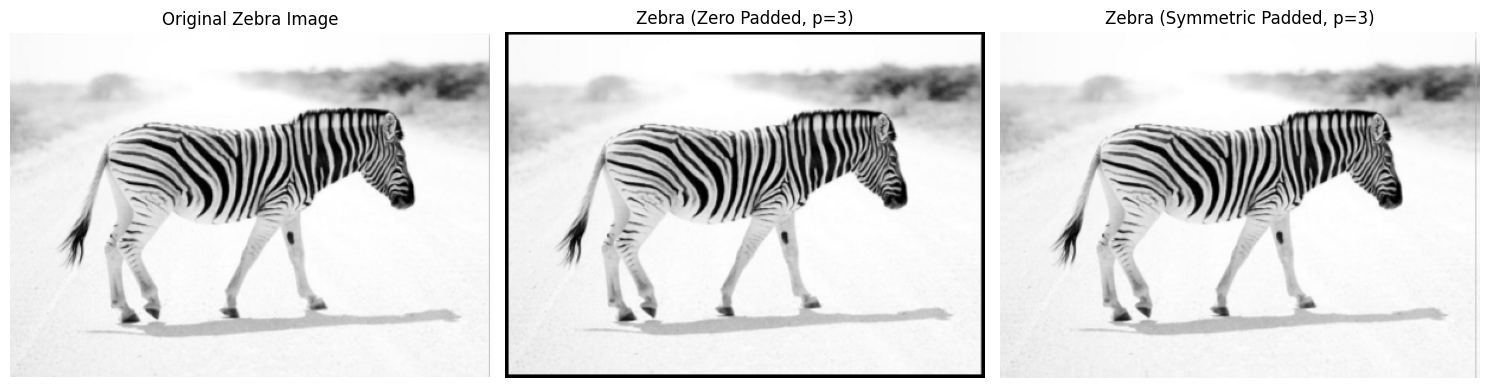

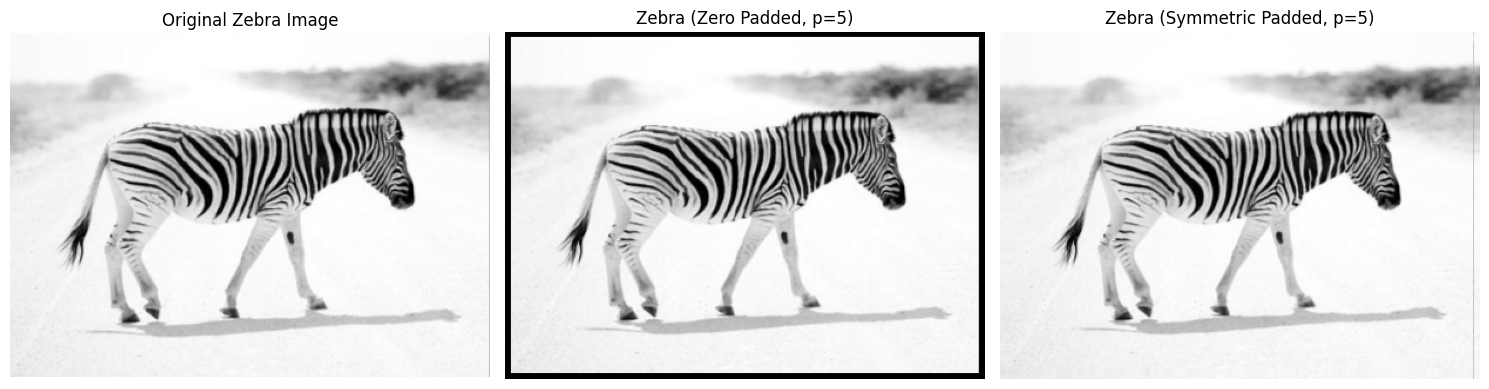

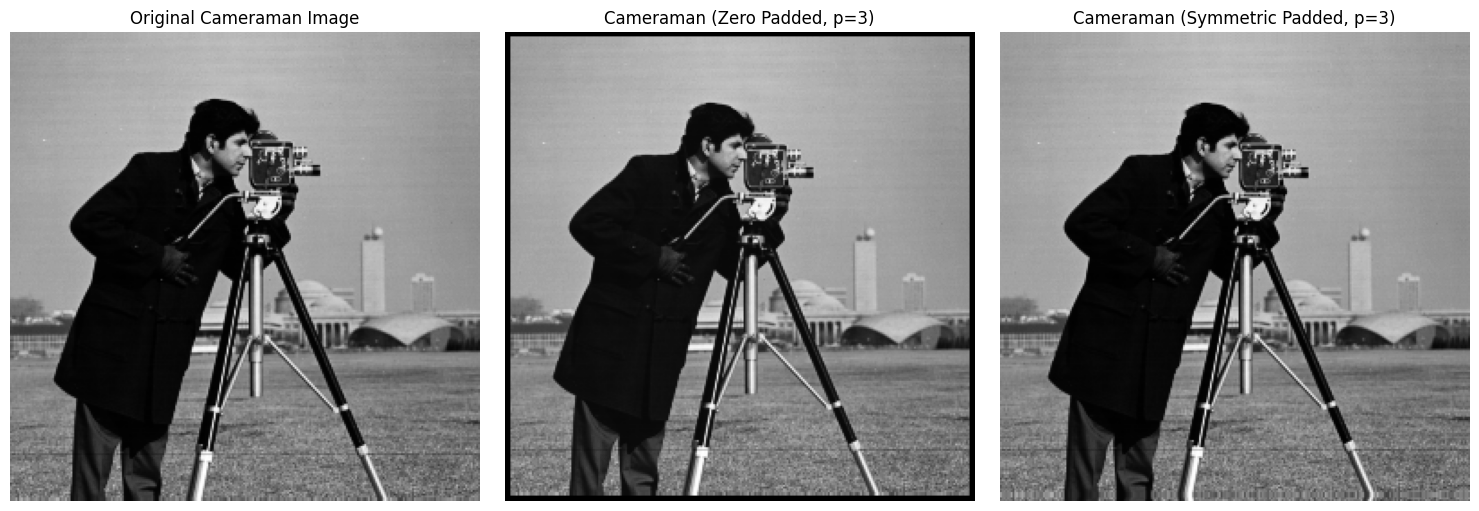

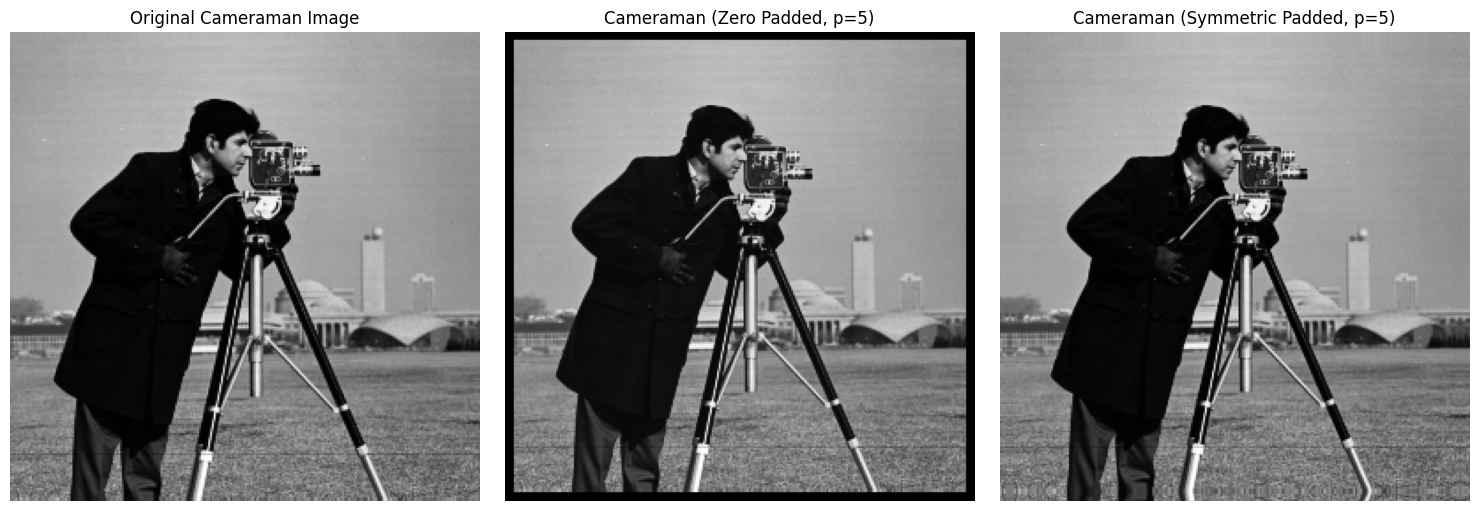

In [112]:
# List of images to process
images = [zebra_image, cameraman_image]
image_names = ["Zebra", "Cameraman"]
p_values = [3, 5]

for image, name in zip(images, image_names):
    for p in p_values:
        # Apply zero padding and symmetric padding
        zero_padded = zero_padding(image, p)
        symmetric_padded = symmetric_padding(image, p)

        # Plot the results
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        axs[0].imshow(image, cmap='gray')
        axs[0].set_title(f"Original {name} Image")
        axs[0].axis("off")

        axs[1].imshow(zero_padded, cmap='gray')
        axs[1].set_title(f"{name} (Zero Padded, p={p})")
        axs[1].axis("off")

        axs[2].imshow(symmetric_padded, cmap='gray')
        axs[2].set_title(f"{name} (Symmetric Padded, p={p})")
        axs[2].axis("off")

        plt.tight_layout()
        plt.show()

1. **What differences do you observe when comparing zero padding and symmetric padding with larger p values?**  
   With larger `p` values, zero padding introduces more visible black borders around the image, while symmetric padding seamlessly extends the image by mirroring its edges, maintaining a natural continuation of the content.

2. **How does the appearance of the padded borders affect the overall visual structure of the images?**  
   Zero padding creates sharp contrasts at the borders, which can be visually disruptive and unnatural, especially for edge detection tasks. Symmetric padding preserves the visual structure by continuing the patterns from the edges, resulting in smoother and more coherent transitions around the borders.

## **Part 3: Implementing the Convolution Operator**

### **Introduction to Convolution**

The convolution operator is one of the core building blocks in image processing. Essentially, convolution applies a filter (or kernel) to an image to produce a transformed version of that image. This is achieved by sliding the kernel over the image and computing a weighted sum at each position.

A 2D convolution between an image `I` and a kernel `K` is defined as:


$$I'(x, y) = \sum_{m=-k}^{k} \sum_{n=-k}^{k} I(x+m, y+n) \cdot K(m, n)$$

Where:
- `I'(x, y)` is the output image at location `(x, y)`
- `I(x+m, y+n)` are the pixels of the input image
- `K(m, n)` are the corresponding kernel values
- `k` is the half-size of the kernel

### **Your Task:**
You need to implement the convolution operator **from scratch**. You will:
1. Take an image and a kernel as input.
2. Apply **convolution** by sliding the kernel over the image.
3. Return the resulting filtered image.

You must **not** use any helper functions such as `scipy.signal.convolve2d` or `np.convolve()`. Instead, manually implement the convolution process.

### **Separable Filters:**
For this assignment, note that all filters you will use can be treated as separable filters. This means you can choose to implement the convolution either using a 1D filter applied in two passes (horizontal and vertical) or directly as a 2D filter. This can simplify your implementation!

---

### **Steps for Convolution Implementation:**
1. **Padding**: Before applying convolution, you'll need to pad the input image appropriately (use your own padding functions from earlier).
2. **Sliding the Kernel**: Slide the kernel over the image and compute the sum of element-wise multiplications at each position.
3. **Storing the Result**: Store the results in a new output image.

In [113]:
def convolve(image, kernel, padding_type):
    """
    Apply 1D/2D convolution between the input image and the kernel.
    :param image: 2D NumPy array (grayscale image)
    :param kernel: 1D/2D NumPy array (convolution kernel)
    :return: Convolved image
    """
    image_height, image_width = image.shape

    # Handle the case where the kernel is 1D
    if len(kernel.shape) == 1:
        kernel = kernel.reshape((1, -1))
    kernel_height, kernel_width = kernel.shape

    # Calculate the amount of padding needed
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the input image given the padding type
    if padding_type == 'zero':
        padded_image = zero_padding(image, max(pad_height, pad_width))
    elif padding_type == 'symmetric':
        padded_image = symmetric_padding(image, max(pad_height, pad_width))

    # Create an output array to store the convolved result
    output_image = np.zeros_like(image)

    # Flip the kernel (both horizontally and vertically)
    flipped_kernel = np.flip(kernel, axis=(0, 1))

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest (kernel-sized)
            region = padded_image[i:i + kernel_height, j:j + kernel_width]

            # Apply the kernel to the region (element-wise multiplication and sum)
            if region.shape == flipped_kernel.shape:
                output_image[i, j] = np.sum(region * flipped_kernel)

    return output_image

### **Sanity Check with a Box Filter**

### **Introduction to the Box Filter**

A **box filter** is one of the simplest types of filters in image processing. It computes the average of the pixel values in a neighborhood around each pixel. A 3x3 box filter looks like this:


$$K_{\text{box}} = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$


This kernel averages the values of each 3x3 region in the image, resulting in a blurring effect.

### **Separable Box Filter:**
The box filter is separable, meaning it can be broken down into two 1D filters. For a 3x3 box filter, it can be represented as the following two 1D filters:

$$
K_{\text{horizontal}} = \frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}, \quad
K_{\text{vertical}} = \frac{1}{3} \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

Using these 1D filters allows you to apply the convolution in two passes: first horizontally and then vertically, which can be more efficient.

### **Task:**
1. Implement the box filter manually as a 3x3 kernel.
2. Apply your `convolve` function using this box filter on both the `zebra.png` and `cameraman.png` images.
3. Visualize the results and check if the images appear blurred, which indicates that the convolution is working correctly.


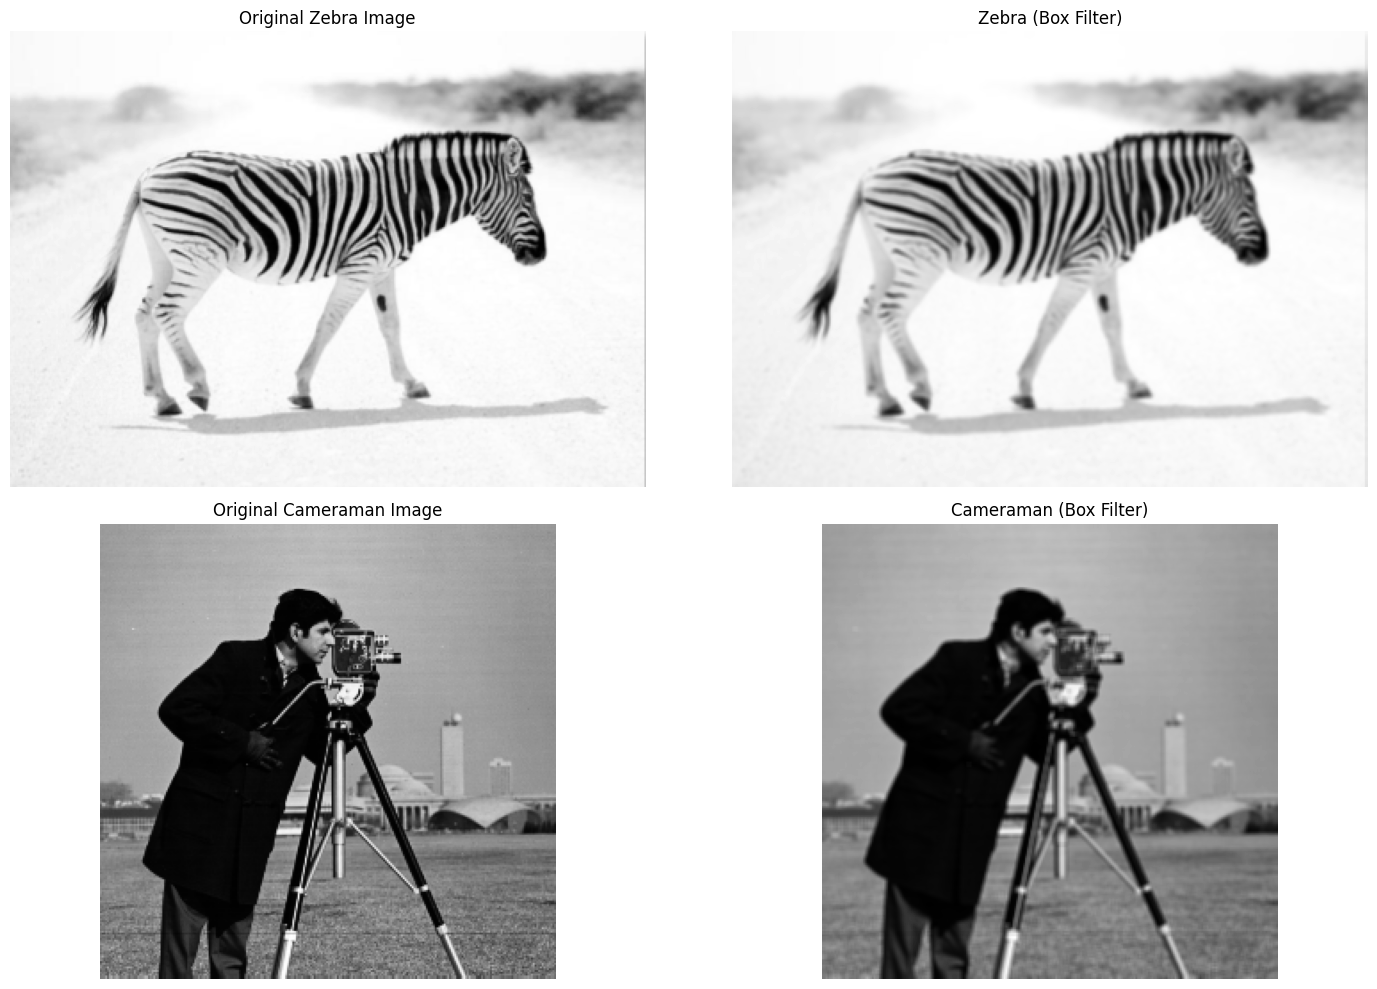

In [114]:
#Check for box filter

# Define the 3x3 box filter
box_filter = (1/9) * np.array([[1, 1, 1],
                               [1, 1, 1],
                               [1, 1, 1]])

# Apply the convolve function to both zebra and cameraman images using the box filter
convolved_zebra_box = convolve(zebra_image, box_filter, 'symmetric')
convolved_cameraman_box = convolve(cameraman_image, box_filter, 'symmetric')

# Plot the results
images = [
    ("Original Zebra Image", zebra_image),
    ("Zebra (Box Filter)", convolved_zebra_box),
    ("Original Cameraman Image", cameraman_image),
    ("Cameraman (Box Filter)", convolved_cameraman_box)
]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (title, img) in zip(axs.flat, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

## **Part 4: Implementing a Gaussian Filter**

### **Introduction to the Gaussian Filter**

The **Gaussian filter** is used for blurring and smoothing images. It weighs pixels based on their distance from the center of the kernel, which results in a more natural blurring effect compared to the box filter. The Gaussian function with mean zero and standard deviation $\sigma$ is defined as:

$$
G(x, y) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Where:
- $\sigma $ is the standard deviation, controlling the extent of the blur.
- $(x, y)$ are the coordinates of the pixel relative to the center of the kernel.

### **Task:**
1. Implement a function to create a Gaussian kernel of size $k \times k$ given a standard deviation $\sigma$.
2. Use your convolution function to apply this Gaussian filter to both the `zebra.png` and `cameraman.png` images.
3. Visualize the results to observe the smoothing effect.

### **Steps to Create the Gaussian Kernel:**
1. Generate a 2D grid of coordinates centered at the origin.
2. Apply the Gaussian function to each point in the grid.
3. Normalize the kernel so that the sum of all its values equals 1.

### **Note on Separable Gaussian Filter**

The Gaussian filter is a **separable filter**, which means that you can implement it as two successive 1D filters instead of a single 2D filter. This can be more efficient in terms of computation.

1. **1D Implementation**: You can create a 1D Gaussian kernel and apply it twice—first in the horizontal direction, then in the vertical direction.
   
2. **2D Implementation**: Alternatively, you may directly implement the full 2D Gaussian kernel as described in the previous section.

Feel free to choose either approach based on your preference and understanding!

### **Hint:**
Start with a kernel size of 3x3 and a reasonable $\sigma$ value (e.g., $\sigma = 1.0$).

In [115]:
def gaussian_kernel(size, sigma):
    """
    Create a Gaussian kernel.
    :param size: Size of the kernel (must be odd)
    :param sigma: Standard deviation for the Gaussian
    :return: Gaussian kernel (1D/2D NumPy array)
    """
    # Ensure the kernel size is odd
    assert size % 2 == 1, "Kernel size must be odd"

    # Create a 2D grid of coordinates centered at the origin
    k = size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))

    # Apply the Gaussian function to each point in the grid
    gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the kernel so that the sum of all its values equals 1
    gaussian /= np.sum(gaussian)

    return gaussian

## **Comparing Results with Different Sigma Values**

Now that you have implemented the Gaussian filter, it's time to see how different values of $\sigma$ affect the output.

### **Task:**
1. Apply the Gaussian filter to both the `zebra.png` and `cameraman.png` images using the following $\sigma$ values: **1, 2, 5,** and **10**.
2. Use both **zero padding** and **symmetric padding** for each $\sigma$ value.
3. Visualize the results for each combination of $\sigma$ and padding type.

### **Questions to Answer (Use 1-2 lines to answer):**
- How does increasing $\sigma$ affect the blurring of the images?
- What differences do you notice between the results obtained using zero padding versus symmetric padding?
- Which padding method preserves the image structure better when using larger \$\sigma$ values?

In [116]:
def apply_gaussian_filter(image, sigma, padding_type):
    """
    Apply Gaussian blur with different padding types.
    :param image: 2D NumPy array (grayscale image)
    :param sigma: Standard deviation for the Gaussian kernel
    :param padding_type: Either 'zero' or 'symmetric'
    :return: Blurred image with the selected padding
    """
    # Generate the Gaussian kernel for the given sigma
    size = 11  # Fixed size kernel to isolate the impact of changing sigma
    gaussian_kernel_ = gaussian_kernel(size, sigma)

    # Apply the Gaussian filter
    return convolve(image, gaussian_kernel_, padding_type)

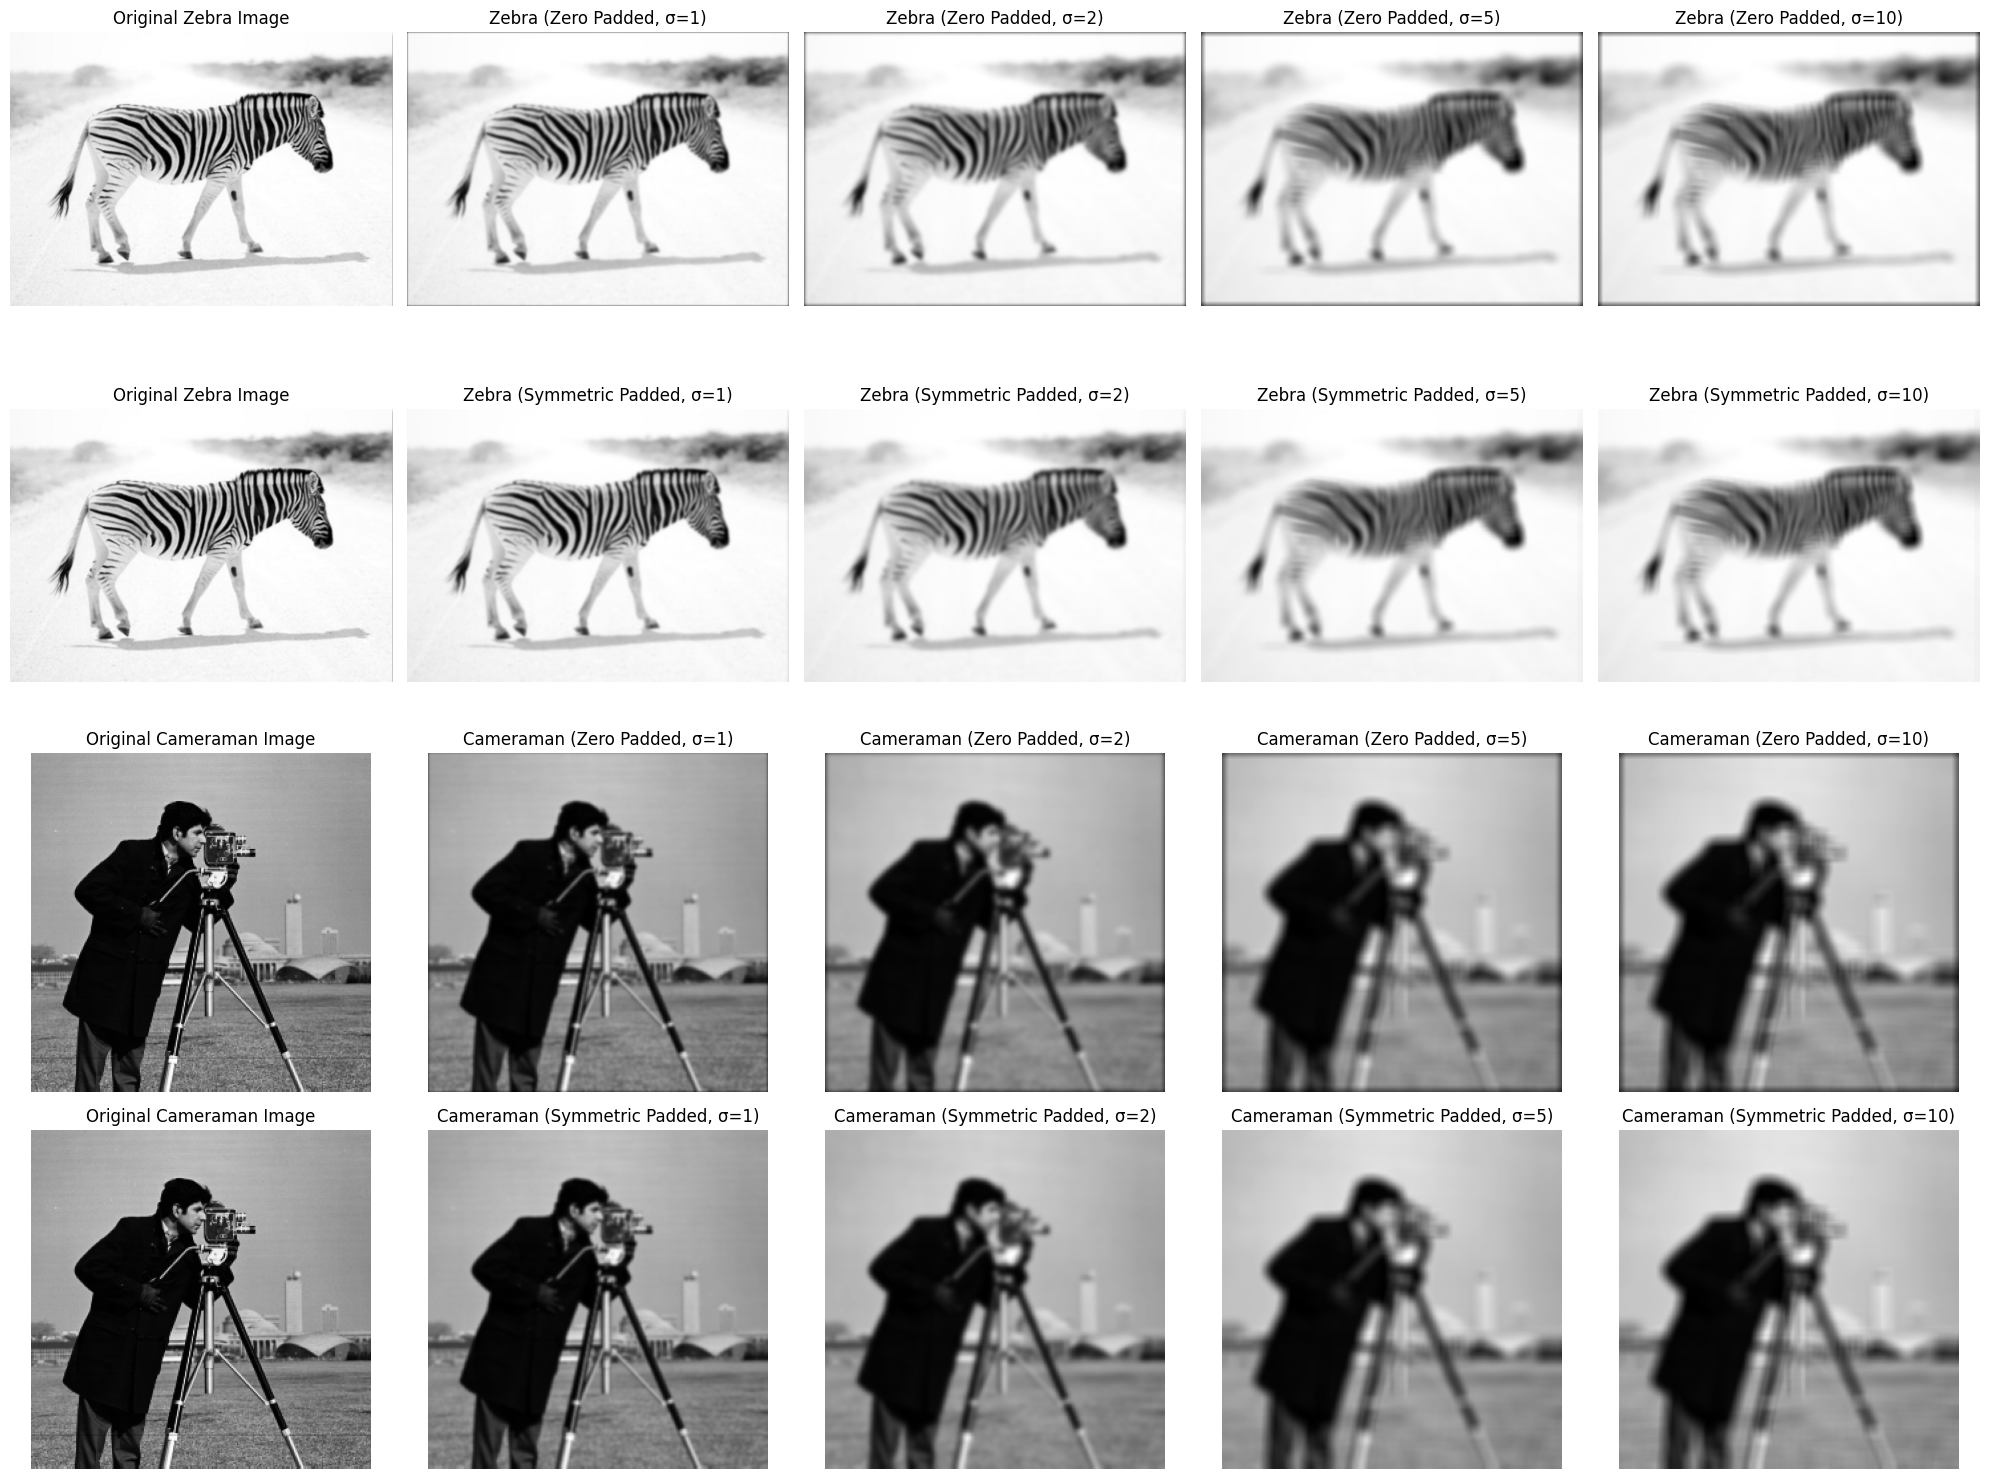

In [117]:
# Compare results

# Parameters
sigma_values = [1, 2, 5, 10]

fig, axs = plt.subplots(4, len(sigma_values) + 1, figsize=(20, 15))

# Plot zebra images with zero padding
axs[0, 0].imshow(zebra_image, cmap='gray')
axs[0, 0].set_title("Original Zebra Image")
for idx, sigma in enumerate(sigma_values):
    # Apply Gaussian filter with zero padding for zebra image
    zebra_zero_padded = apply_gaussian_filter(zebra_image, sigma, 'zero')
    axs[0, idx + 1].imshow(zebra_zero_padded, cmap='gray')
    axs[0, idx + 1].set_title(f"Zebra (Zero Padded, σ={sigma})")

# Plot zebra images with symmetric padding
axs[1, 0].imshow(zebra_image, cmap='gray')
axs[1, 0].set_title("Original Zebra Image")
for idx, sigma in enumerate(sigma_values):
    # Apply Gaussian filter with symmetric padding for zebra image
    zebra_symmetric_padded = apply_gaussian_filter(zebra_image, sigma, 'symmetric')
    axs[1, idx + 1].imshow(zebra_symmetric_padded, cmap='gray')
    axs[1, idx + 1].set_title(f"Zebra (Symmetric Padded, σ={sigma})")

# Plot cameraman images with zero padding
axs[2, 0].imshow(cameraman_image, cmap='gray')
axs[2, 0].set_title("Original Cameraman Image")
for idx, sigma in enumerate(sigma_values):
    # Apply Gaussian filter with zero padding for cameraman image
    cameraman_zero_padded = apply_gaussian_filter(cameraman_image, sigma, 'zero')
    axs[2, idx + 1].imshow(cameraman_zero_padded, cmap='gray')
    axs[2, idx + 1].set_title(f"Cameraman (Zero Padded, σ={sigma})")

# Plot cameraman images with symmetric padding
axs[3, 0].imshow(cameraman_image, cmap='gray')
axs[3, 0].set_title("Original Cameraman Image")
for idx, sigma in enumerate(sigma_values):
    # Apply Gaussian filter with symmetric padding for cameraman image
    cameraman_symmetric_padded = apply_gaussian_filter(cameraman_image, sigma, 'symmetric')
    axs[3, idx + 1].imshow(cameraman_symmetric_padded, cmap='gray')
    axs[3, idx + 1].set_title(f"Cameraman (Symmetric Padded, σ={sigma})")

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

1. **How does increasing $\sigma$ affect the blurring of the images?**  
   Increasing $\sigma$ leads to more pronounced blurring, as the Gaussian filter spreads over a larger area, averaging more distant pixels and softening the image details.

2. **What differences do you notice between the results obtained using zero padding versus symmetric padding?**  
   Zero padding introduces black borders around the edges, disrupting the natural flow of the image, while symmetric padding maintains a more continuous and natural edge by mirroring the pixels.

3. **Which padding method preserves the image structure better when using larger $\sigma$ values?**  
   Symmetric padding preserves the image structure better, especially for larger $\sigma$ values, as it avoids artificial black borders and maintains smooth transitions at the edges.

## **Part 5: Edge Detection Using 1D Filters**

### **Introduction to Edge Detection**

Edge detection is a critical step in image processing, often used to identify boundaries within images. You can use 1D filters for this purpose.

### **1D Edge Detection Filters:**
Common 1D edge detection filters include:

- **Sobel Filter (Horizontal)**:
$$
K_x =
\begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}
$$
- **Sobel Filter (Vertical)**:
$$
K_y =
\begin{bmatrix}
-1 \\
0 \\
1
\end{bmatrix}
$$

### **Preprocessing Step: Gaussian Smoothing**
Before applying the edge detection filters, it is beneficial to apply a Gaussian filter. This step helps to reduce noise in the image, improving the quality of the edges detected. Smoothing the image prior to edge detection can lead to more accurate and cleaner results.

### **Task:**
1. Apply a Gaussian filter to both `zebra.png` and `cameraman.png` images using a suitable $\sigma$ (e.g., 2.0).
2. Choose a single padding method that you feel is the best (either zero padding or symmetric padding).
3. Implement the 1D Sobel filters for horizontal and vertical edge detection.
4. Plot the following:
   - **X Derivative**: The result of applying the horizontal Sobel filter.
   - **Y Derivative**: The result of applying the vertical Sobel filter.
   - **Absolute Magnitude**: Combine the X and Y derivatives to compute the absolute magnitude of the gradient.
   $
   \text{Magnitude} = \sqrt{(G_x)^2 + (G_y)^2}
   $
   - **Thresholded Image**: Apply a threshold to the absolute magnitude to create a binary edge-detected image. You can choose a threshold value (e.g., 50) to determine the edges.
   - **Gradient Direction**: Compute and plot the gradient direction using the arctangent function.
   $
   \text{Direction} = \arctan\left(\frac{G_y}{G_x}\right)
   $

### **Questions to Answer:**
- What do you observe in the absolute magnitude image?
- How does the threshold value affect the edge-detected image?

**Note:** You may not get all edges perfectly detected using first derivative filters with simple thresholding, as they may miss some subtle features. Second derivative filters tend to provide better edge detection, but for this assignment, we will focus on first derivative filters.

In [118]:
def apply_sobel_edge_detection(image, sigma, threshold):
    """
    Apply Sobel edge detection after Gaussian smoothing.
    :param image: 2D NumPy array (grayscale image)
    :param sigma: Standard deviation for the Gaussian kernel used in smoothing
    :param threshold: Value above which edges are detected in the magnitude image
    :return:
        - x_derivative: Image after applying the horizontal Sobel filter (edges in X direction)
        - y_derivative: Image after applying the vertical Sobel filter (edges in Y direction)
        - magnitude: Gradient magnitude combining the X and Y derivatives
        - thresholded_image: Binary edge map after applying the threshold
        - direction: Gradient direction (in radians) indicating the edge orientation
    """
    # Apply Gaussian smoothing
    smooth_image = apply_gaussian_filter(image, sigma, 'symmetric')

    # Sobel filters
    sobel_x = np.array([-1, 0, 1])  # Horizontal filter
    sobel_y = sobel_x.reshape((-1, 1))  # Vertical filter

    # Convolve with Sobel filters for X and Y derivatives
    x_derivative = convolve(smooth_image, sobel_x, 'symmetric')  # Horizontal edges
    y_derivative = convolve(smooth_image, sobel_y, 'symmetric')  # Vertical edges

    # Calculate magnitude and direction
    magnitude = np.sqrt(x_derivative**2 + y_derivative**2)
    direction = np.arctan2(y_derivative, x_derivative)

    # Apply threshold to detect edges
    thresholded_image = np.where(magnitude > threshold, 255, 0)

    return x_derivative, y_derivative, magnitude, thresholded_image, direction

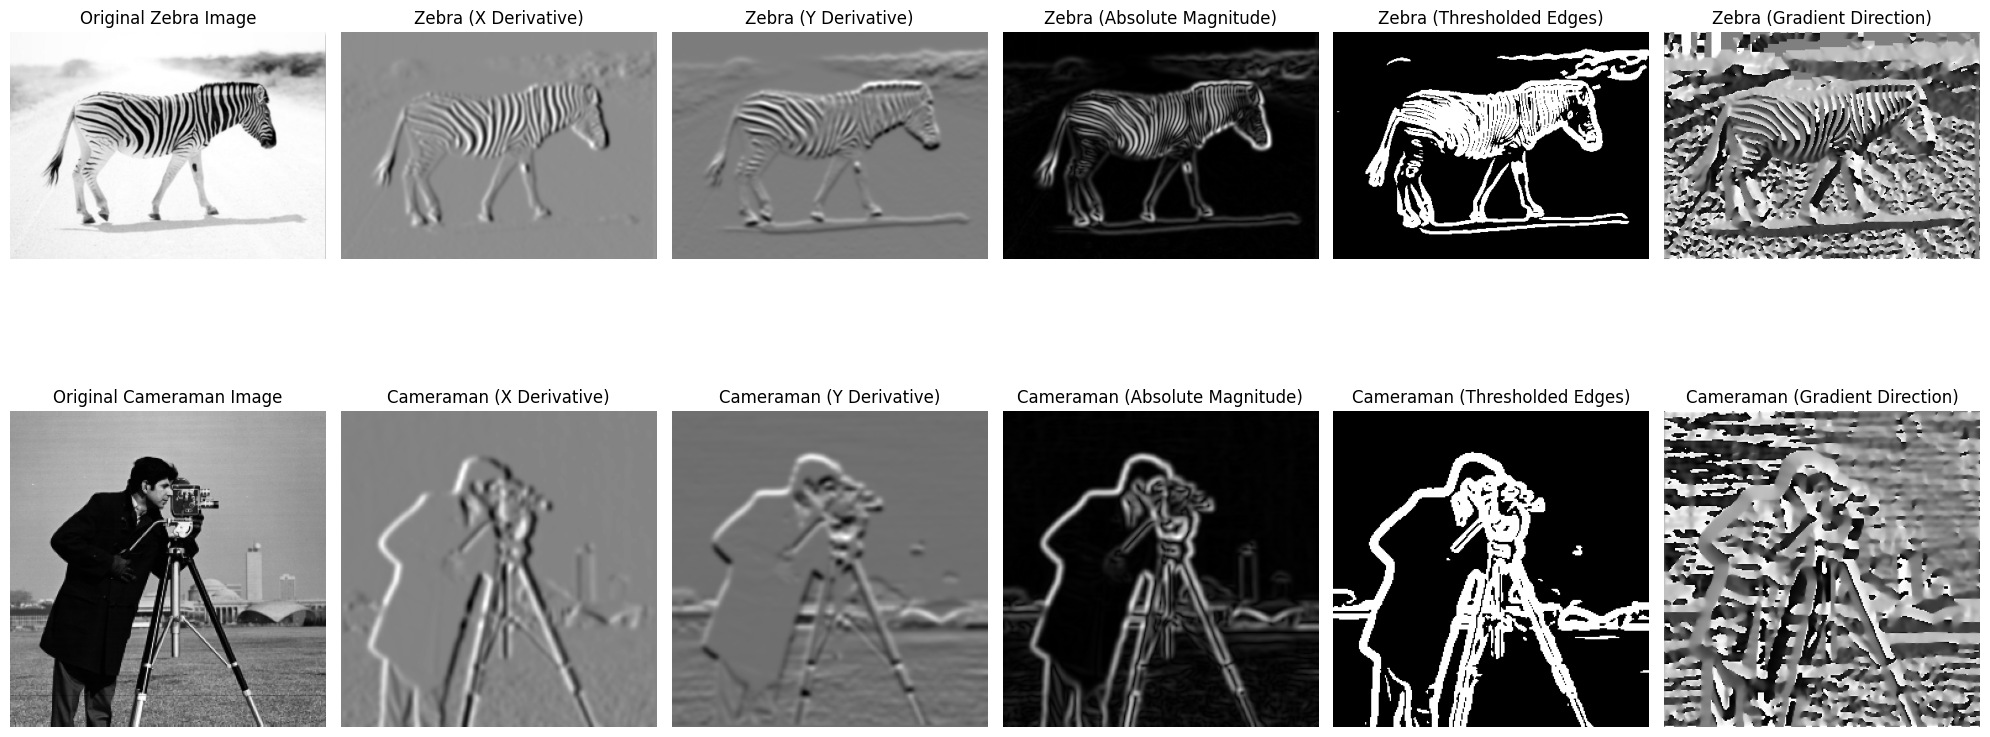

In [119]:
# Parameters
sigma = 2.0
threshold = 0.05

# Apply Sobel edge detection to both zebra and cameraman images
zebra_xD, zebra_yD, zebra_magnitude, zebra_thresholded, zebra_direction = apply_sobel_edge_detection(zebra_image, sigma, threshold)
cameraman_xD, cameraman_yD, cameraman_magnitude, cameraman_thresholded, cameraman_direction = apply_sobel_edge_detection(cameraman_image, sigma, threshold)

# Plot the results
sobel_results = [
    ("Original Zebra Image", zebra_image, "Original Cameraman Image", cameraman_image),
    ("Zebra (X Derivative)", zebra_xD, "Cameraman (X Derivative)", cameraman_xD),
    ("Zebra (Y Derivative)", zebra_yD, "Cameraman (Y Derivative)", cameraman_yD),
    ("Zebra (Absolute Magnitude)", zebra_magnitude, "Cameraman (Absolute Magnitude)", cameraman_magnitude),
    ("Zebra (Thresholded Edges)", zebra_thresholded, "Cameraman (Thresholded Edges)", cameraman_thresholded),
    ("Zebra (Gradient Direction)", zebra_direction, "Cameraman (Gradient Direction)", cameraman_direction)
]

fig, axs = plt.subplots(2, 6, figsize=(20, 10))

for col, (zebra_title, zebra_img, cameraman_title, cameraman_img) in enumerate(sobel_results):
    axs[0, col].imshow(zebra_img, cmap='gray')
    axs[0, col].set_title(zebra_title)
    axs[0, col].axis('off')

    axs[1, col].imshow(cameraman_img, cmap='gray')
    axs[1, col].set_title(cameraman_title)
    axs[1, col].axis('off')

plt.tight_layout()
plt.show()

### 1. **What do you observe in the absolute magnitude image?**

The absolute magnitude images (calculated using the Sobel X and Y derivatives) highlight the edges in the image. These edges are the areas where the pixel intensity changes most rapidly, which corresponds to significant transitions such as object boundaries. In both the zebra and cameraman images, the magnitude captures prominent edges, such as the outline of the zebra and the tripod in the cameraman image. However, there are also minor details (like the zebra's stripes) that show up in the magnitude image, revealing how sensitive Sobel filters are to these intensity changes.

### 2. **How does the threshold value affect the edge-detected image?**

The threshold value determines which edges are strong enough to be included in the final edge-detected image. In this case, a threshold of `0.05` was used, which results in filtering out weaker edges. Only the most prominent edges (such as the zebra's outline and the cameraman's tripod) are visible.

- **Low threshold**: More edges are detected, but this might include noise or insignificant edges, leading to a cluttered edge-detected image.
- **High threshold**: Only the strongest edges are detected, which reduces noise but may miss finer details. For instance, raising the threshold further could result in some parts of the zebra's stripes disappearing.

In summary, the threshold value controls the trade-off between noise and edge clarity—lower values capture more detail (but potentially more noise), while higher values capture only the most prominent edges.